### Purpose:

Using Descriptive Statistics, apply different calculations to measure insights such as:

+ Countries that average the highest/lowest spending
+ Countries above and below average
+ Grouping coutries by percentiles
+ More to add as the project progresses

What concepts will be practiced?

+ Estimates of Location
+ Estimates of Variability
+ Exploring Data Distribution
+ Binary and Categorical Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from scipy.stats import trim_mean
from statsmodels import robust

# reading in the csv
df = pd.read_csv('data/state_csv.csv')
df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [2]:
# understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [3]:
# rounding and transposing the basic descriptive analyics
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Population,50.0,6162876.30,6848235.35,563626.0,1833004.25,4436369.5,6680312.25,37253956.0
Murder.Rate,50.0,4.07,1.92,0.9,2.42,4.0,5.55,10.3


## Calculating Different Estimates of Location

### For the first exercise, will use the year 2016

#### Mean 
+ Sum of all values divided by the number of values

#### Median
+ (50th Percentile) The value where such value of the data is above, and the other half below

### Trimmed Mean
+ The average of all values after dropping a fixed set of extreme values

### Weighted Mean
+ The sum of all values times a weight divided by the sum of the weights

In [4]:
# renaming the column Murder.Rate to Murder Rate
df = df.rename({"Murder.Rate" : "Murder Rate"}, axis = 1)

# looking at the first five columns to also ensure the renaming also worked
df.head(5)

,State,Population,Murder Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
# calculating the average
mean_pop = round(df['Population'].mean(), 2)
mean_pop

6162876.3

In [6]:
# calculating the median
median_pop = round(df['Population'].median(), 2)
median_pop

4436369.5

In [7]:
# calculating the trimmed mean
trim_mean_pop = round(stats.trim_mean(df['Population'], 0.1),2)
trim_mean_pop

4783697.12

In [8]:
# calculating the trim mean in a different way to confirm it matches and it works
tr_mean_2 = round(trim_mean(df['Population'], 0.1), 2)
tr_mean_2

4783697.12

In [9]:
# calculating the weighted mean
weighted_mean = round(np.average(df['Murder Rate'], weights = df['Population']),2)
weighted_mean

4.45

In [10]:
import wquantiles

# calculating the weighted median
weighted_median = round(wquantiles.median(df['Murder Rate'], weights = df['Population']), 2)
weighted_median

4.4

## Estimates of Variability 

### Deviations
+ Measure that is used to find the difference betwen the observed value and the expected value of a variable. In other words, it is the distance from the centre point
+ Value - mean of the data

### Variance 
+ The sum of squared deviatons from the mean divided by n - 1 where n is the number of data values
+ Sum of deviations/(count of data values - 1)

### Standard Deviation
+ The Square Root of the Variance

### Mean Absolute Deviation
+ The mean of the absolute values of the deviations from the mean

### Percentile
+ The value such that P percent of the values take on this value or less (100-P) percent to take on this value or more

### Interquartile Range (IQR)
+ The difference between the 75th percentile and the 25th percentile

In [11]:
# calculating the standard deviation of the population

std_deviation = round(df['Population'].std(),2)
std_deviation

6848235.35

In [12]:
# calculating the interquartile range of the population

iqr = round(df['Population'].quantile(0.75) - df['Population'].quantile(0.25), 2)
iqr

4847308.0

In [13]:
# using numpy to find mean absolute deviation

data = df['Population']
mean = np.mean(data)
abs_dev = np.absolute(data - mean)
mad = round(np.mean(abs_dev), 2)
mad

4450933.36

In [14]:
# now lets use pandas .mad() to see if we get the same answer

p_mad = round(df['Population'].mad(), 2)
p_mad

4450933.36

### Percentiles

In [15]:
# percentiles of population by state

df['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64

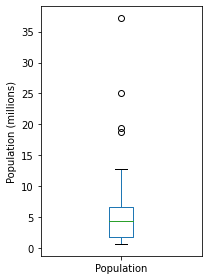

In [16]:
# creating a boxplot to visualize the distribution of population by state

ax = (df['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show();

### Key Takeaways from the Boxplot above

+ The horizontal line is the median which is close to 5 million
+ The top and bottom half of the both are the 75th and the 25th percentile
+ The line, also known as whiskers, at beginning at the start and ending at the top closer to 13 Million represent the range for the bulk of the data (excluding outliers)

### Frequency Table and Histogram

+ Divides up the variable range into equally spaced segments and tells us how many values fall within each segment
+ The function pandas.cut() creates a series that maps the values into the segment
+ Using the method value_counts() we can get the frequency tables

In [17]:
binned_population = pd.cut(df['Population'],10)
binned_population.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [18]:
binned_population.name = 'binnedpopulation'
df = pd.concat([df, binned_population], axis = 1)
df = df.sort_values(by = 'Population')

groups = []
for group, subset in df.groupby(by='binnedpopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

### Takeaways

+ The least populous state is Wyoming (Top Left) with 536,626 people 
+ The most populated state is California with 37,253,956 people
+ This gives us a range of 37,253,956 - 536,626 which gives us 36,690,330 to divide into equal size bins

### Next Steps

+ Create a visual for the frequency table above

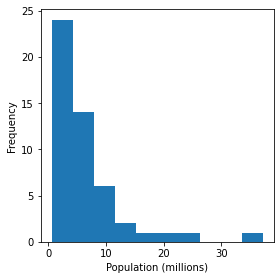

In [19]:
ax = (df['Population'] / 1_000_000).plot.hist(figsize = (4,4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show();

### Density Estimates

+ Shows the distribution of data values as a continous line
+ A density plot can be thought of as a smoothed histogram
+ Although it is typically computed directly from the data as a kernel density estimate

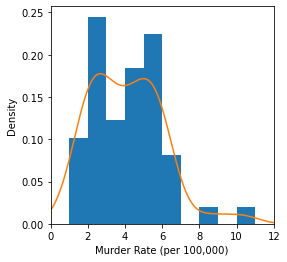

In [25]:
ax = df['Murder Rate'].plot.hist(density = True, xlim = [0,12], bins = range(1,12), figsize = (4,4))

df['Murder Rate'].plot.density(ax = ax)
ax.set_xlabel('Murder Rate (per 100,000)')
plt.show();

### Exploring Binary and Categorical Data

+ For categorical data, simple proportions or percentages tell the story of data

### Key Terms for Exploring Categorical Data

+ Mode: Most commonly occurring category or value in a dataset
+ Expected Value: When the categories are associated with a numeric value
+ Bar Charts: The frequency or proportion for each category plotted as bars
+ Pie Charts: The frequency or proportion for each category plotted as wedges in a pie

### Next Steps

+ Import airport delays per year by cause for Dallas/Fort Worth(DFW)
+ Delays are categorized as being due to factors under:

- Carrier Control
- Air Traffic Control
- Control (ATC) System Delays
- Weather Security
- Late Inbound Aircraft

In [21]:
dfw = pd.read_csv('data/airport_delays.csv')

In [22]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Carrier   1 non-null      float64
 1   ATC       1 non-null      float64
 2   Weather   1 non-null      float64
 3   Security  1 non-null      float64
 4   Inbound   1 non-null      float64
dtypes: float64(5)
memory usage: 168.0 bytes


In [23]:
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


### Bar Charts

+ Are a common visualization tool for displaying single categorical variables
+ Categories are listed on the x-axis and frequencies or proportions on the y-axis

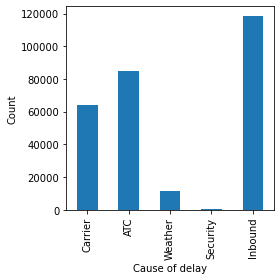

In [27]:
ax = dfw.T.plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show();

### Correlation

#### Key Terms for Correlation

+ Correlation Coefficient: A matric that measures the extext to which numeric variables are associated with one another (ranges from -1 to +1)
+ Correlation Matrix: A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables